# Recommandation System

In [15]:
import pandas as pd
overall = {'data':{'Own Code Lines':350,
            'External Code Lines':200,
            'Existing Accuracy':'70%',
            'Our Accuracy':'72%',
            'Time to Run':'60min'}}
pd.DataFrame(overall)

,data
Existing Accuracy,70%
External Code Lines,200
Our Accuracy,72%
Own Code Lines,350
Time to Run,60min


## Objective
* Design and implement the Movie Recommendation System based on MovieLens Datasets, and evaluate the accuracy and efficiency of our recommendation model
* Analyze the dataset of movie comments by using NLP methods, and exact useful comment keywords for a specific movie
* According to the NLP result, we will generate the subjective tags for every movie, like "good", "boring", "suck" and so on, which will help clients to find their interests

## Part 1 NLP for Movie comments

### 1. Load Data

In [14]:
import pandas as pd
import numpy as np
df=pd.read_csv('./movie_review/movie_review_2.csv') 
df

,num,title,rating(10),review
0,1,Avengers: Infinity War (2018),10,This movie is the beginning of the culmination...
1,2,Avengers: Infinity War (2018),10,This movie will blow your mind and break your ...
2,3,Avengers: Infinity War (2018),10,A Summer Film That IS Even Better Than The Hype
3,4,Avengers: Infinity War (2018),9,I was amazed to see so many negative reviews; ...
4,5,Avengers: Infinity War (2018),10,All the reviews that say this movie has no plo...
5,6,Avengers: Infinity War (2018),10,Epic conclusion to Marvel's first 10 years
6,7,Avengers: Infinity War (2018),9,"I went and looked, and I want to express my th..."
7,8,Avengers: Infinity War (2018),10,"Engrossing, Epic, Emotional. Those are the thr..."
8,9,Avengers: Infinity War (2018),9,"Well, Well, Well....\n\nI was so ready to tear..."
9,10,Avengers: Infinity War (2018),10,Everything we could've hoped for


In [7]:
review = df.ix[0].review
review

/Users/leonardyuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


'This movie is the beginning of the culmination of Marvel\'s masterfully woven cinematic universe. Beginning back in 2008 with iron man, we are finally seeing the results of all the movies have been pointing to; and it did not disappoint. Thanos is a complex villain, with deeper and more interesting desires than just "world domination." The dilemmas all the characters face in this movie (both the heroes and the villains) are truly thought provoking and leave you on the edge of your seat. No other set of movies has beeen so involved, so expanded, and encompassed so many story lines/characters and previous movies. The sheer amount of star power alone in this film is insane; and they do a masterful job of weaving all these unique and various characters into a common storyline.'

### 2. Split Data

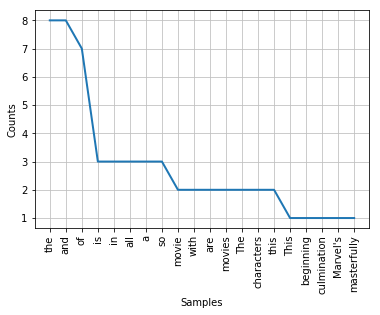

In [11]:
import nltk
tokens = review.split()
freq = nltk.FreqDist(tokens)
freq.plot(20, cumulative=False)

We can eliminate the stopwords:

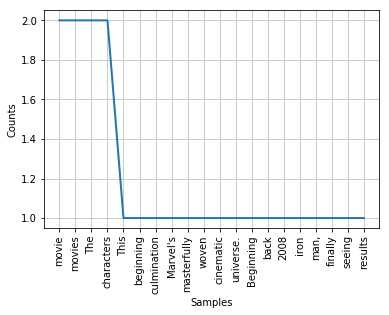

In [13]:
from nltk.corpus import stopwords
tokens = [t for t in review.split()]
clean_tokens = tokens[:]
 
sr = stopwords.words('english')
 
for token in tokens:
 
    if token in stopwords.words('english'):
 
        clean_tokens.remove(token)

freq = nltk.FreqDist(clean_tokens)
freq.plot(20, cumulative=False)

### 3. Start NLP Processing

/Users/leonardyuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


Get the review======>
Start to make NLP operation
Get the review======>
Start to make NLP operation
Get the review======>
Start to make NLP operation
Get the review======>
Start to make NLP operation
Get the review======>
Start to make NLP operation
Get the review======>
Start to make NLP operation
Get the review======>
Start to make NLP operation
Get the review======>
Start to make NLP operation
Get the review======>
Start to make NLP operation
Get the review======>
Start to make NLP operation
Get the review======>
Start to make NLP operation
Get the review======>
Start to make NLP operation
Get the review======>
Start to make NLP operation
Get the review======>
Start to make NLP operation
Get the review======>
Start to make NLP operation
Get the review======>
Start to make NLP operation
Get the review======>
Start to make NLP operation
Get the review======>
Start to make NLP operation
Get the review======>
Start to make NLP operation
Get the review======>
Start to make NLP operation


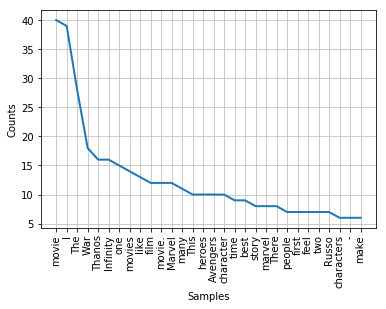

In [16]:
result = []
for i in range(25):
    review = df.ix[i].review
    print("Get the review======>")
    tokens = [t for t in review.split()]
    clean_tokens = tokens[:]
    print('Start to make NLP operation')
    sr = stopwords.words('english')
    for token in tokens:
        if token not in stopwords.words('english'):
            result.append(token)

freq = nltk.FreqDist(result)
freq.plot(30, cumulative=False)

/Users/leonardyuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Get the review======>
Get the review======>
Get the review======>
Get the review======>
Get the review======>
Get the review======>
Get the review======>
Get the review======>
Get the review======>
Get the review======>
Get the review======>
Get the review======>
Get the review======>
Get the review======>
Get the review======>
Get the review======>
Get the review======>
Get the review======>
Get the review======>
Get the review======>
Get the review======>
Get the review======>
Get the review======>
Get the review======>
Get the review======>


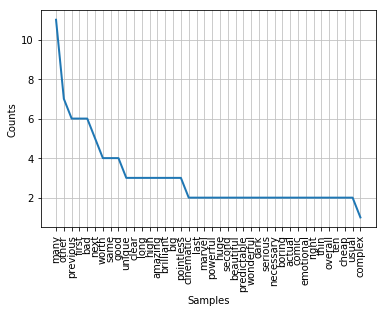

In [43]:
from nltk.corpus import wordnet as wn
from nltk.tag import pos_tag_sents
result = []

for i in range(25):
    review = df.ix[i].review
    print("Get the review======>")
    tokens = nltk.word_tokenize(review)
    tags = nltk.pos_tag(tokens)
    for item in tags:
        if(item[1] == "JJ"):
            result.append(item[0])
            
freq = nltk.FreqDist(result)
freq.plot(40, cumulative=False)

## Part 2 Collaborative Filtering
### 1. Introduction of Collaborative filtering

**Collaborative filtering** is a method of making automatic predictions (filtering) about the interests of a user by collecting preferences or taste information from many users (collaborating). 

Here is the example of CF algorithm.

![](images/CF.png)

#### What we should do to use Collaborative Filtering Algorithm?
- We should make data cleansing
- We should converse the datas
- We should generate the basic matrix for counting the interactions between users and items
- We should calculate the similarity of users or items, then generate similaritry matrix
- According to the similarity of matrix, we can generate the final recommendation lists

### 2. User-CF Algorithm

One of the most important algorithms in recommendation field,  UB-CF uses that logic and recommends items by finding similar users to the active user (to whom we are trying to recommend a movie). A specific application of this is the user-based **Nearest Neighbor algorithm**. This algorithm needs two tasks:

- Find the K-nearest neighbors (KNN) to the user a, using a similarity function w to measure the distance between each pair of users
- Predict the rating that user a will give to all items the k neighbors have consumed but a has not.

We design and implement our model according to this book:
    
![](images/Cover.png)

In our model, we should generate the reversed lists at the beginning, like:
    
![](images/matrics.png)

Then we start to calculate the similarity of the users, this is the one of the most important steps in our porcess,
typically we can discribe our calcaulating process like:

![](images/usercf.png)

But sometimes we should concern some special datas, like this user is extremely active, thus it is likey that he cannot show apparent interests in this models, thus we should design special **punishing factor** to eliminate this phenomenon, this is called **Long tail Theory**, so we can get the modified algorithm like:

![](images/user-iif.png)

Thus, we can design our model according this equation:

![](images/alg.png)

### 3. How to make data cleansing and intergration

In [98]:
import math
import pandas as pd
import numpy as np                  
df=pd.read_csv('data/ratings.csv') 
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [99]:
df = df[['userId','movieId']]
print(len(df))

100836


In [100]:
df = df.drop_duplicates()
print(len(df))

100836


In [101]:
users = df[['userId']]
movies = df[['movieId']]

In [102]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(users,movies,test_size=0.2)

In [103]:
train = x_train.join(y_train, how='outer')
train.head()

,userId,movieId
49581,318,71468
56748,377,5468
1224,10,86548
66864,432,1835
52841,346,6987


### 4. How to Design make the List

In [104]:
import csv

class Handle(object):
    def __init__(self):
        pass

    # User is the key.
    def users_standard(self, train):
        userMode = dict()
        
        for index, row in train.iterrows():
            userid = row['userId']
            movieid = row['movieId']
            if userid in userMode:
                userMode[userid].add(movieid)
            else:
                item=set()
                item.add(movieid)
                userMode[userid]=item

        return userMode

    # Movie is the key.
    def movies_standard(self, train):
        movieMode = dict()
        for index, row in train.iterrows():
            userid = row['userId']
            movieid = row['movieId']
            if movieid in movieMode:
                movieMode[movieid].add(userid)
            else:
                users = set()
                users.add(userid)
                movieMode[movieid] = users
        return movieMode

In [105]:
handler = Handle()
ulist = handler.users_standard(train)
mlist = handler.movies_standard(train)
print(len(ulist))
print(len(mlist))

610
8981


In [113]:
import csv, math
maxR = 20

class userCF(object):
    def __init__(self):
        pass

    # main function of this section
    def userCF_alg(self,ID,userLists,movieLists):
        W = self.related_martix(movieLists)
        Rlist = self.userIIF(W,ID,userLists,movieLists)
        return Rlist

    # Calculate related_martix
    def related_martix(self,mLists):
        print("## Related matrix is generating............")
        C = dict()
        N = dict()

        for i in mLists:
            users = mLists[i]
            for u in users:
                if u in N:
                    N[u]+=1
                else:
                    N[u]=1

                for v in users:
                    if u == v:
                        continue
                    else:
                        if u in C:
                            pass
                        else:
                            C[u] = dict()

                        if v in C[u]:
                            C[u][v] += 1/math.log(1+len(users))
                        else:
                            C[u][v] = 1/math.log(1 + len(users))

        W = dict()
        for u, related_users in C.items():
            if u in W:
                pass
            else:
                W[u] = dict()

            for v, cuv in related_users.items():
                W[u][v] = cuv/math.sqrt(N[u]*N[v])
                #print(W[u][v])
        return W

    # Genreate Recommand list.
    def userIIF(self,W,ID,uLists,mLists):
        print("## Recommand list is generating................")
        matchM = dict()
        if ID in W:
            Similar = W[ID]
            for item in Similar:
                for movieitem in uLists[item]:
                    if movieitem in uLists[ID]:
                        pass
                    else:
                        if movieitem in matchM:
                            matchM[movieitem] += Similar[item]
                        else:
                            matchM[movieitem] = 0
                            matchM[movieitem] += Similar[item]

            sortL = sorted(matchM.items(), key=lambda d: d[1], reverse=True) # turn dict into list

            if len(sortL) == 0:
                return None
            else:
                finalList = list()
                if (len(sortL) < maxR):
                    for item in sortL:
                        finalList.append(item[0])
                else:
                    for item in sortL[:maxR]:
                        # print("%s : %s"%(item[0],item[1]))
                        finalList.append(item[0])
                    return finalList

        else:
            return None

        return None

In [114]:
usercf = userCF()
matrix = usercf.related_martix(mlist)
len(matrix)

## Related matrix is generating............


610

In [117]:
result = usercf.userIIF(matrix,1,ulist,mlist)
result

## Recommand list is generating................


[356,
 296,
 318,
 480,
 589,
 1270,
 150,
 2762,
 608,
 858,
 380,
 377,
 588,
 32,
 1214,
 4993,
 7153,
 1197,
 364,
 5952]

In [148]:
import pandas as pd                 
movies=pd.read_csv('data/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [150]:
movieResult = movies[movies['movieId'].isin(result)]

In [151]:
movieResult

,movieId,title,genres
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
123,150,Apollo 13 (1995),Adventure|Drama|IMAX
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
277,318,"Shawshank Redemption, The (1994)",Crime|Drama
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War
322,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
334,377,Speed (1994),Action|Romance|Thriller
337,380,True Lies (1994),Action|Adventure|Comedy|Romance|Thriller
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
506,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical


## Part 3 Tensorflow Movie Recommendation
### 1. Load and Process Data

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from collections import Counter
import tensorflow as tf

import os
import pickle
import re
from tensorflow.python.ops import math_ops

**Define the function load data**
* Load Data from csv file
* Transfer data to array, which is easier to use
* Movie csv contains three rows: movieId, movie title and movie genres
* Movie genre only contains 20 types, so use a map to map the type to an unique genre id from 0 to 19. The only thing needs to do is split the genres with |
* Each movie has one name which is different from the other. So first, delete the year, which is useless for the movie recommendation. Then, split the movie title with title_count, which this time is 15. Each 15 character has one unique id for identitify

In [1]:
def load_data():
    movies = pd.read_csv('./data/movies.csv', sep=',', header=0, engine = 'python')
    movies_orig = movies.values

    title_map = {val:(val[:val.find('(')] if val.find('(')!=-1 else val) for ii,val in enumerate(set(movies['title']))}
    movies['title'] = movies['title'].map(title_map)
    
    genres_set = set()
    for val in movies['genres'].str.split('|'):
        genres_set.update(val)

    genres_set.add('<PAD>')
    genres2int = {val:ii for ii, val in enumerate(genres_set)}
    genres_map = {val:[genres2int[row] for row in val.split('|')] for ii,val in enumerate(set(movies['genres']))}

    for key in genres_map:
        for cnt in range(max(genres2int.values()) - len(genres_map[key])):
            genres_map[key].insert(len(genres_map[key]) + cnt,genres2int['<PAD>'])
    
    movies['genres'] = movies['genres'].map(genres_map)

    title_set = set()
    for val in movies['title'].str.split():
        title_set.update(val)
    
    title_set.add('<PAD>')
    title2int = {val:ii for ii, val in enumerate(title_set)}

    title_count = 15
    title_map = {val:[title2int[row] for row in val.split()] for ii,val in enumerate(set(movies['title']))}
    
    for key in title_map:
        for cnt in range(title_count - len(title_map[key])):
            title_map[key].insert(len(title_map[key]) + cnt,title2int['<PAD>'])
    
    movies['title'] = movies['title'].map(title_map)

    ratings = pd.read_csv('./data/ratings.csv', sep=',', header=0, engine = 'python')
    ratings = ratings.filter(regex='userId|movieId|rating')
    
    data = pd.merge(ratings, movies)
    
    target_fields = ['rating']
    features_pd, targets_pd = data.drop(target_fields, axis=1), data[target_fields]
    
    features = features_pd.values
    targets_values = targets_pd.values
    
    return title_count, title_set, genres2int, features, targets_values, ratings, movies, data, movies_orig

**Show Processed Data**

In [4]:
title_count, title_set, genres2int, features, targets_values, ratings, movies, data, movies_orig = load_data()
data.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,"[2747, 7569, 7431, 7431, 7431, 7431, 7431, 743...","[4, 13, 10, 18, 7, 11, 11, 11, 11, 11, 11, 11,..."
1,5,1,4.0,"[2747, 7569, 7431, 7431, 7431, 7431, 7431, 743...","[4, 13, 10, 18, 7, 11, 11, 11, 11, 11, 11, 11,..."
2,7,1,4.5,"[2747, 7569, 7431, 7431, 7431, 7431, 7431, 743...","[4, 13, 10, 18, 7, 11, 11, 11, 11, 11, 11, 11,..."
3,15,1,2.5,"[2747, 7569, 7431, 7431, 7431, 7431, 7431, 743...","[4, 13, 10, 18, 7, 11, 11, 11, 11, 11, 11, 11,..."
4,17,1,4.5,"[2747, 7569, 7431, 7431, 7431, 7431, 7431, 743...","[4, 13, 10, 18, 7, 11, 11, 11, 11, 11, 11, 11,..."


In [32]:
len(features)

100836

In [6]:
len(features[0])

4

In [35]:
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [36]:
features[2]

array([7, 1,
       list([5129, 6520, 7607, 7607, 7607, 7607, 7607, 7607, 7607, 7607, 7607, 7607, 7607, 7607, 7607]),
       list([18, 12, 6, 20, 19, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17])],
      dtype=object)

**Define Some Parameter**

In [8]:
embed_dim = 32
uid_max = max(features.take(0,1)) + 1
mid_max = max(features.take(1,1)) + 1
categories_max = max(genres2int.values()) + 1
title_max = len(title_set)

uid_max,mid_max,categories_max,title_max

(611, 193610, 21, 9126)

**Define Tensorflow Placeholder**

In [9]:
def get_inputs():
    uid = tf.placeholder(tf.int32, [None, 1], name="uid")
    
    movie_id = tf.placeholder(tf.int32, [None, 1], name="movie_id")
    movie_categories = tf.placeholder(tf.int32, [None, 20], name="movie_categories")
    movie_titles = tf.placeholder(tf.int32, [None, 15], name="movie_titles")
    targets = tf.placeholder(tf.int32, [None, 1], name="targets")
    
    LearningRate = tf.placeholder(tf.float32, name = "LearningRate")
    dropout_keep_prob = tf.placeholder(tf.float32, name = "dropout_keep_prob")
    return uid, movie_id, movie_categories, movie_titles, targets, LearningRate, dropout_keep_prob

### 2. Build Network
![](images/network.jpeg)
**Create Layers for Neural Networks**

In [10]:
def get_user_embed_layer(uid):
    with tf.name_scope("user_embeding"):
        uid_embed_matrix = tf.Variable(tf.random_uniform([uid_max, embed_dim], -1, 1), name = "uid_embed_matrix")
        uid_embed_layer = tf.nn.embedding_lookup(uid_embed_matrix, uid, name = "uid_embed_layer")
        return uid_embed_layer
def get_movie_embed_layer(movie_id):
    with tf.name_scope("movie_embedding"):
        movie_id_embed_matrix = tf.Variable(tf.random_uniform([mid_max, embed_dim], -1, 1), name = "movie_id_embed_matrix")
        movie_id_embed_layer = tf.nn.embedding_lookup(movie_id_embed_matrix, movie_id, name = "movie_id_embed_layer")
    return movie_id_embed_layer

In [11]:
def get_movie_categories_layers(movie_categories):
    with tf.name_scope("movie_categories_layers"):
        movie_categories_embed_matrix = tf.Variable(tf.random_uniform([categories_max, embed_dim], -1, 1), name = "movie_categories_embed_matrix")
        movie_categories_embed_layer = tf.nn.embedding_lookup(movie_categories_embed_matrix, movie_categories, name = "movie_categories_embed_layer")
        movie_categories_embed_layer = tf.reduce_sum(movie_categories_embed_layer, axis=1, keep_dims=True)
    return movie_categories_embed_layer

In [12]:
sentences_size = title_count
window_sizes = {2, 3, 4, 5}

filter_num = 8

movieid2idx = {val[0]:i for i, val in enumerate(movies.values)}
num_epochs = 1
batch_size = 256
dropout_keep = 0.5
learning_rate = 0.0001
show_every_n_batches = 50

save_dir = './save'

#### Create Layer for Words
**Text convolutional network**  
The first layer of the network is the word embedding layer, an embedding matrix consisting of the embedded vectors of each word. The next layer uses a number of different size (window size) convolution kernels to convolve on the embedded matrix. The window size refers to each convolution covering several words. This is not the same as convolving the image. The convolution of the image is usually 2x2, 3x3, 5x5, and the text convolution is to cover the embedded vector of the entire word, so the size is (number of words, vector dimension). For example, slide 3, 4 or 5 words at a time. The third layer network is max pooling to get a long vector, and finally use dropout for regularization, and finally get the characteristics of the movie Title.
![](images/text_cnn.png)
**Dropout Layer to Solve the Problem of Overfitting**

In [13]:
def get_movie_cnn_layer(movie_titles):
    with tf.name_scope("movie_embedding"):
        movie_title_embed_matrix = tf.Variable(tf.random_uniform([title_max, embed_dim], -1, 1), name = "movie_title_embed_matrix")
        movie_title_embed_layer = tf.nn.embedding_lookup(movie_title_embed_matrix, movie_titles, name = "movie_title_embed_layer")
        movie_title_embed_layer_expand = tf.expand_dims(movie_title_embed_layer, -1)

    pool_layer_lst = []
    for window_size in window_sizes:
        with tf.name_scope("movie_txt_conv_maxpool_{}".format(window_size)):
            filter_weights = tf.Variable(tf.truncated_normal([window_size, embed_dim, 1, filter_num],stddev=0.1),name = "filter_weights")
            filter_bias = tf.Variable(tf.constant(0.1, shape=[filter_num]), name="filter_bias")
            
            conv_layer = tf.nn.conv2d(movie_title_embed_layer_expand, filter_weights, [1,1,1,1], padding="VALID", name="conv_layer")
            relu_layer = tf.nn.relu(tf.nn.bias_add(conv_layer,filter_bias), name ="relu_layer")
            
            maxpool_layer = tf.nn.max_pool(relu_layer, [1,sentences_size - window_size + 1 ,1,1], [1,1,1,1], padding="VALID", name="maxpool_layer")
            pool_layer_lst.append(maxpool_layer)

    with tf.name_scope("pool_dropout"):
        pool_layer = tf.concat(pool_layer_lst, 3, name ="pool_layer")
        max_num = len(window_sizes) * filter_num
        pool_layer_flat = tf.reshape(pool_layer , [-1, 1, max_num], name = "pool_layer_flat")
    
        dropout_layer = tf.nn.dropout(pool_layer_flat, dropout_keep_prob, name = "dropout_layer")
    return pool_layer_flat, dropout_layer

**Combine All Layers**

In [14]:
def get_movie_feature_layer(uid_embed_layer, movie_id_embed_layer, movie_categories_embed_layer, dropout_layer):
    with tf.name_scope("movie_fc"):
        uid_fc_layer = tf.layers.dense(uid_embed_layer, embed_dim, name = "uid_fc_layer", activation=tf.nn.relu)
        movie_id_fc_layer = tf.layers.dense(movie_id_embed_layer, embed_dim, name = "movie_id_fc_layer", activation=tf.nn.relu)
        movie_categories_fc_layer = tf.layers.dense(movie_categories_embed_layer, embed_dim, name = "movie_categories_fc_layer", activation=tf.nn.relu)
    
        movie_combine_layer = tf.concat([uid_fc_layer, movie_id_fc_layer, movie_categories_fc_layer, dropout_layer], 2) 
        movie_combine_layer = tf.contrib.layers.fully_connected(movie_combine_layer, 200, tf.tanh)
    
        movie_combine_layer_flat = tf.reshape(movie_combine_layer, [-1, 200])
    return movie_combine_layer, movie_combine_layer_flat

### 3. Train Data
**Create Graph for Training**

In [15]:
tf.reset_default_graph()
train_graph = tf.Graph()
with train_graph.as_default():
    uid, movie_id, movie_categories, movie_titles, targets, lr, dropout_keep_prob = get_inputs()
    uid_embed_layer = get_user_embed_layer(uid)
    movie_id_embed_layer = get_movie_embed_layer(movie_id)    
    movie_categories_embed_layer = get_movie_categories_layers(movie_categories)
    
    pool_layer_flat, dropout_layer = get_movie_cnn_layer(movie_titles)
    
    movie_combine_layer, movie_combine_layer_flat = get_movie_feature_layer(uid_embed_layer,
                                                                            movie_id_embed_layer, 
                                                                            movie_categories_embed_layer, 
                                                                            dropout_layer)
    with tf.name_scope("inference"):
        inference = tf.reduce_sum(movie_combine_layer_flat, axis=1)
        inference = tf.expand_dims(inference, axis=1)

    with tf.name_scope("loss"):
        cost = tf.losses.mean_squared_error(targets, inference)
        loss = tf.reduce_mean(cost)
    global_step = tf.Variable(0, name="global_step", trainable=False)
    optimizer = tf.train.AdamOptimizer(lr)
    gradients = optimizer.compute_gradients(loss)
    train_op = optimizer.apply_gradients(gradients, global_step=global_step)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use keras.layers.dense instead.

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.


**Use This to Split Training Data for Small Parts**

In [16]:
def get_batches(Xs, ys, batch_size):
    for start in range(0, len(Xs), batch_size):
        end = min(start + batch_size, len(Xs))
        yield Xs[start:end], ys[start:end]

In [17]:
inference

<tf.Tensor 'inference/ExpandDims:0' shape=(?, 1) dtype=float32>

**Start Training**

In [18]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import time
import datetime

losses = {'train':[], 'test':[]}

with tf.Session(graph=train_graph) as sess:
    
    grad_summaries = []
    for g, v in gradients:
        if g is not None:
            grad_hist_summary = tf.summary.histogram("{}/grad/hist".format(v.name.replace(':', '_')), g)
            sparsity_summary = tf.summary.scalar("{}/grad/sparsity".format(v.name.replace(':', '_')), tf.nn.zero_fraction(g))
            grad_summaries.append(grad_hist_summary)
            grad_summaries.append(sparsity_summary)
    grad_summaries_merged = tf.summary.merge(grad_summaries)
        
    timestamp = str(int(time.time()))
    out_dir = os.path.abspath(os.path.join(os.path.curdir, "runs", timestamp))
    print("Writing to {}\n".format(out_dir))
     
    # Summaries for loss and accuracy
    loss_summary = tf.summary.scalar("loss", loss)

    # Train Summaries
    train_summary_op = tf.summary.merge([loss_summary, grad_summaries_merged])
    train_summary_dir = os.path.join(out_dir, "summaries", "train")
    train_summary_writer = tf.summary.FileWriter(train_summary_dir, sess.graph)

    # Inference summaries
    inference_summary_op = tf.summary.merge([loss_summary])
    inference_summary_dir = os.path.join(out_dir, "summaries", "inference")
    inference_summary_writer = tf.summary.FileWriter(inference_summary_dir, sess.graph)

    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    for epoch_i in range(num_epochs):
        
        train_X,test_X, train_y, test_y = train_test_split(features,  
                                                           targets_values,  
                                                           test_size = 0.2,  
                                                           random_state = 0)  
        
        train_batches = get_batches(train_X, train_y, batch_size)
        test_batches = get_batches(test_X, test_y, batch_size)
    
        for batch_i in range(len(train_X) // batch_size):
            x, y = next(train_batches)

            categories = np.zeros([batch_size, 20])
            for i in range(batch_size):
                categories[i] = x.take(3,1)[i]

            titles = np.zeros([batch_size, sentences_size])
            for i in range(batch_size):
                titles[i] = x.take(2,1)[i]

            feed = {
                uid: np.reshape(x.take(0,1), [batch_size, 1]),
                movie_id: np.reshape(x.take(1,1), [batch_size, 1]),
                movie_categories: categories,
                movie_titles: titles,
                targets: np.reshape(y, [batch_size, 1]),
                dropout_keep_prob: dropout_keep,
                lr: learning_rate}

            step, train_loss, summaries, _ = sess.run([global_step, loss, train_summary_op, train_op], feed)  #cost
            losses['train'].append(train_loss)
            train_summary_writer.add_summary(summaries, step)
            
            # Show every <show_every_n_batches> batches
            if (epoch_i * (len(train_X) // batch_size) + batch_i) % show_every_n_batches == 0:
                time_str = datetime.datetime.now().isoformat()
                print('{}: Epoch {:>3} Batch {:>4}/{}   train_loss = {:.3f}'.format(
                    time_str,
                    epoch_i,
                    batch_i,
                    (len(train_X) // batch_size),
                    train_loss))
                
        for batch_i  in range(len(test_X) // batch_size):
            x, y = next(test_batches)
            
            categories = np.zeros([batch_size, 20])
            for i in range(batch_size):
                categories[i] = x.take(3,1)[i]

            titles = np.zeros([batch_size, sentences_size])
            for i in range(batch_size):
                titles[i] = x.take(2,1)[i]

            feed = {
                uid: np.reshape(x.take(0,1), [batch_size, 1]),
                movie_id: np.reshape(x.take(1,1), [batch_size, 1]),
                movie_categories: categories, 
                movie_titles: titles, 
                targets: np.reshape(y, [batch_size, 1]),
                dropout_keep_prob: 1,
                lr: learning_rate}
            
            step, test_loss, summaries = sess.run([global_step, loss, inference_summary_op], feed)  #cost

            losses['test'].append(test_loss)
            inference_summary_writer.add_summary(summaries, step) 

            time_str = datetime.datetime.now().isoformat()
            if (epoch_i * (len(test_X) // batch_size) + batch_i) % show_every_n_batches == 0:
                print('{}: Epoch {:>3} Batch {:>4}/{}   test_loss = {:.3f}'.format(
                    time_str,
                    epoch_i,
                    batch_i,
                    (len(test_X) // batch_size),
                    test_loss))

    saver.save(sess, save_dir)
    print('Model Trained and Saved')

Writing to /Users/wukaichun/Documents/data/final/runs/1555621142

2019-04-18T16:59:03.994765: Epoch   0 Batch    0/315   train_loss = 20.519
2019-04-18T16:59:11.419335: Epoch   0 Batch   50/315   train_loss = 4.069
2019-04-18T16:59:18.811844: Epoch   0 Batch  100/315   train_loss = 3.110
2019-04-18T16:59:26.208336: Epoch   0 Batch  150/315   train_loss = 2.030
2019-04-18T16:59:33.643238: Epoch   0 Batch  200/315   train_loss = 1.704
2019-04-18T16:59:40.977652: Epoch   0 Batch  250/315   train_loss = 1.536
2019-04-18T16:59:48.308454: Epoch   0 Batch  300/315   train_loss = 1.581
2019-04-18T16:59:50.424324: Epoch   0 Batch    0/78   test_loss = 1.065
2019-04-18T16:59:50.707020: Epoch   0 Batch   50/78   test_loss = 1.441
Model Trained and Saved


### 4. Test
**Draw Training Losses**

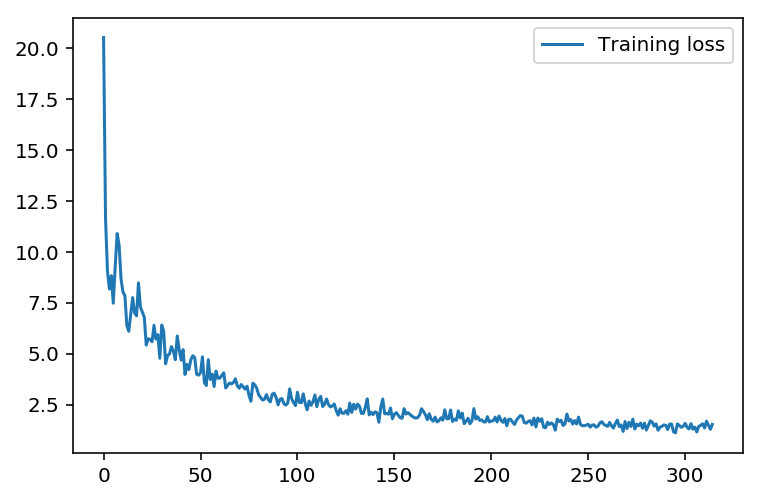

In [19]:
plt.plot(losses['train'], label='Training loss')
plt.legend()
_ = plt.ylim()

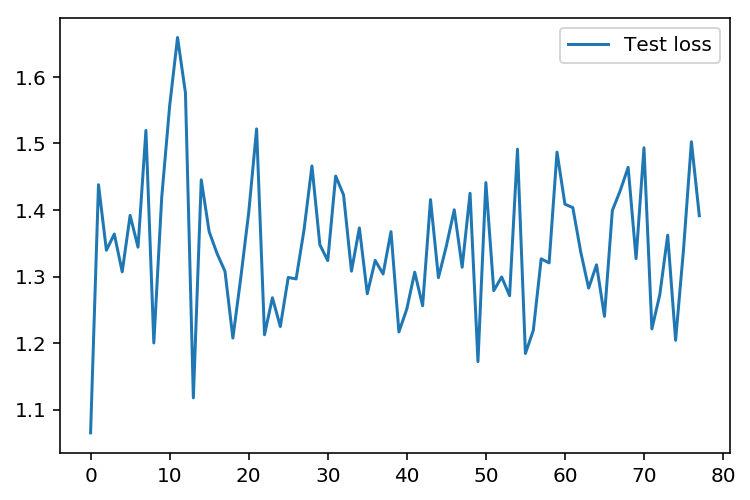

In [20]:
plt.plot(losses['test'], label='Test loss')
plt.legend()
_ = plt.ylim()

**Great Tensor from Graph for Next Computing**

In [21]:
def get_tensors(loaded_graph):

    uid = loaded_graph.get_tensor_by_name("uid:0")
    movie_id = loaded_graph.get_tensor_by_name("movie_id:0")
    movie_categories = loaded_graph.get_tensor_by_name("movie_categories:0")
    movie_titles = loaded_graph.get_tensor_by_name("movie_titles:0")
    targets = loaded_graph.get_tensor_by_name("targets:0")
    dropout_keep_prob = loaded_graph.get_tensor_by_name("dropout_keep_prob:0")
    lr = loaded_graph.get_tensor_by_name("LearningRate:0")
    inference = loaded_graph.get_tensor_by_name("inference/ExpandDims:0")
    movie_combine_layer_flat = loaded_graph.get_tensor_by_name("movie_fc/Reshape:0")
    return uid, movie_id, movie_categories, movie_titles, targets, lr, dropout_keep_prob, inference, movie_combine_layer_flat

**Define This Function to Rate the Movie Using user_id and movie_id**

In [22]:
def rating_movie(user_id_val, movie_id_val):
    loaded_graph = tf.Graph()  
    with tf.Session(graph=loaded_graph) as sess:  
        # Load saved model
        loader = tf.train.import_meta_graph(save_dir + '.meta')
        loader.restore(sess, save_dir)
    
        # Get Tensors from loaded model
        uid, movie_id, movie_categories, movie_titles, targets, lr, dropout_keep_prob, inference,_ = get_tensors(loaded_graph)  #loaded_graph
    
        categories = np.zeros([1, 20])
        categories[0] = movies.values[movieid2idx[movie_id_val]][2]
    
        titles = np.zeros([1, sentences_size])
        titles[0] = movies.values[movieid2idx[movie_id_val]][1]
    
        feed = {
              uid: np.reshape(ratings.values[user_id_val-1][0], [1, 1]),
              movie_id: np.reshape(movies.values[movieid2idx[movie_id_val]][0], [1, 1]),
              movie_categories: categories, 
              movie_titles: titles, 
              dropout_keep_prob: 1}
    
        # Get Prediction
        inference_val = sess.run([inference], feed)  
    
        return (inference_val)

In [23]:
rating_movie(234, 1401)

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./save


[array([[3.5659926]], dtype=float32)]

**Create Movie Matrics**

In [65]:
loaded_graph = tf.Graph()  
movie_matrics = []
with tf.Session(graph=loaded_graph) as sess:  
    # Load saved model
    loader = tf.train.import_meta_graph(save_dir + '.meta')
    loader.restore(sess, save_dir)

    # Get Tensors from loaded model
    uid, movie_id, movie_categories, movie_titles, targets, lr, dropout_keep_prob, _, movie_combine_layer_flat = get_tensors(loaded_graph)  #loaded_graph

    for item in features:
        categories = np.zeros([1, 20])
        categories[0] = item.take(3)

        titles = np.zeros([1, sentences_size])
        titles[0] = item.take(2)

        feed = {
            uid: np.reshape(item.take(0), [1, 1]),
            movie_id: np.reshape(item.take(1), [1, 1]),
            movie_categories: categories,
            movie_titles: titles, 
            dropout_keep_prob: 1}

        movie_combine_layer_flat_val = sess.run([movie_combine_layer_flat], feed)  
        movie_matrics.append(movie_combine_layer_flat_val)

pickle.dump((np.array(movie_matrics).reshape(-1, 200)), open('movie_matrics.p', 'wb'))
movie_matrics = pickle.load(open('movie_matrics.p', mode='rb'))

INFO:tensorflow:Restoring parameters from ./save


**Define the Function to Recommend Same Type Movie**

In [27]:
def recommend_same_type_movie(movie_id_val, top_k = 20):
    
    loaded_graph = tf.Graph()  
    with tf.Session(graph=loaded_graph) as sess:  
        # Load saved model
        loader = tf.train.import_meta_graph(save_dir + '.meta')
        loader.restore(sess, save_dir)
        
        norm_movie_matrics = tf.sqrt(tf.reduce_sum(tf.square(movie_matrics), 1, keep_dims=True))
        normalized_movie_matrics = movie_matrics / norm_movie_matrics

        probs_embeddings = (movie_matrics[movieid2idx[movie_id_val]]).reshape([1, 200])
        probs_similarity = tf.matmul(probs_embeddings, tf.transpose(normalized_movie_matrics))
        sim = (probs_similarity.eval())
        
        print()
        print("The movie you watch：{}".format(movies_orig[movieid2idx[movie_id_val]]))
        print("Below is recommendation：")
        p = np.squeeze(sim)
        p[np.argsort(p)[:-top_k]] = 0
        p = p / np.sum(p)
        results = set()
        sz = len(p)
        while len(results) != 15:
            c = np.random.choice(sz, 1, p=p)[0]
            results.add(c)
        for val in (results):
            print(val)
            print(movies_orig[val])
        
        return results

In [91]:
recommend_same_type_movie(1401, 20)

INFO:tensorflow:Restoring parameters from ./save

The movie you watch：[1401 'Ghosts of Mississippi (1996)' 'Drama']
Below is recommendation：
928
[1227 'Once Upon a Time in America (1984)' 'Crime|Drama']
1088
[1413 'Whole Wide World, The (1996)' 'Drama']
866
[1144 'Line King: The Al Hirschfeld Story, The (1996)' 'Documentary']
995
[1297 'Real Genius (1985)' 'Comedy']
868
[1148 'Wallace & Gromit: The Wrong Trousers (1993)'
 'Animation|Children|Comedy|Crime']
933
[1233 'Boot, Das (Boat, The) (1981)' 'Action|Drama|War']
1065
[1382 'Marked for Death (1990)' 'Action|Drama']
1066
[1385 'Under Siege (1992)' 'Action|Drama|Thriller']
1035
[1347 'Nightmare on Elm Street, A (1984)' 'Horror|Thriller']
885
[1180 'Hear My Song (1991)' 'Comedy']
952
[1253 'Day the Earth Stood Still, The (1951)' 'Drama|Sci-Fi|Thriller']
920
[1219 'Psycho (1960)' 'Crime|Horror']
1080
[1401 'Ghosts of Mississippi (1996)' 'Drama']
1021
[1332 'Believers, The (1987)' 'Horror|Thriller']
927
[1226 'Quiet Man, The (1952)' 'Dra

{866,
 868,
 885,
 920,
 927,
 928,
 933,
 952,
 995,
 1021,
 1035,
 1065,
 1066,
 1080,
 1088}

In [40]:
user_set = set(features[:,0])
len(user_set)

610

In [112]:
movie_matrics = pickle.load(open('movie_matrics.p', mode='rb'))
np.shape(movie_matrics)

(100836, 200)

**Create User Matrics--Use Random Matrics**

In [87]:
loaded_graph = tf.Graph()  #
with tf.Session(graph=loaded_graph) as sess:  #
    # Load saved model
    loader = tf.train.import_meta_graph(save_dir + '.meta')
    loader.restore(sess, save_dir)
    
    user_matrics = sess.run(tf.random_uniform([len(user_set),200],-1,1))
    #print(np.shape(user_matrics))
pickle.dump((np.array(user_matrics).reshape(-1, 200)), open('user_matrics.p', 'wb'))

INFO:tensorflow:Restoring parameters from ./save


In [113]:
user_matrics = pickle.load(open('user_matrics.p', mode='rb'))
np.shape(user_matrics)

(610, 200)

**Map from Movie Id to Movie Name**

In [275]:
fid_to_movie = {
    fid:''.join(movies_orig[np.where(movies_orig[:,0]==fid),1][0])
    for fid in set(features[:,1])
}
fid_to_movie[features[78371][1]]

'Treasure Planet (2002)'

**Recommend Movie By Movie Id**

In [276]:
def recommend_your_favorite_movie(user_id_val, top_k = 10, show = True):

    loaded_graph = tf.Graph()  #
    with tf.Session(graph=loaded_graph) as sess:  #
        # Load saved model
        loader = tf.train.import_meta_graph(save_dir + '.meta')
        loader.restore(sess, save_dir)

        probs_embeddings = (user_matrics[user_id_val-1]).reshape([1, 200])

        probs_similarity = tf.matmul(probs_embeddings, tf.transpose(movie_matrics))
        sim = (probs_similarity.eval())
    
        print("Your Recommendations：")
        p = np.squeeze(sim)
        p[np.argsort(p)[:-top_k]] = 0
        p = p / np.sum(p)
        results = set()
        sz = len(p)
        while len(results) != 10:
            c = np.random.choice(sz, 1, p=p)[0]
            results.add(c)
        if(show):
            for val in (results):
                #print(features[val][1])
                print(fid_to_movie[features[val][1]])

        return results

In [277]:
recommend_your_favorite_movie(1,10)

INFO:tensorflow:Restoring parameters from ./save
Your Recommendations：
Transformers: Dark of the Moon (2011)
Treasure Planet (2002)
Treasure Planet (2002)
Madagascar: Escape 2 Africa (2008)
Kung Fu Panda 2 (2011)
Treasure Planet (2002)
Kung Fu Panda 2 (2011)
Spider-Man 2 (2004)
Megamind (2010)
Spider-Man 2 (2004)


{38441, 38463, 42950, 42953, 67885, 68002, 78371, 78372, 78375, 84420}

**The Function that Add Key,Value Pairs(UserId,Recommendations) whose user_id from fromIndex to toIndex**

In [262]:
def csv_dicts(fromIndex, toIndex, csv_rec, top_k = 5, show = False):

    loaded_graph = tf.Graph()
    with tf.Session(graph=loaded_graph) as sess:
        loader = tf.train.import_meta_graph(save_dir + '.meta')
        loader.restore(sess, save_dir)
        for user_id_val in range(fromIndex+1,toIndex+1):
            probs_embeddings = (user_matrics[user_id_val-1]).reshape([1, 200])
            probs_similarity = tf.matmul(probs_embeddings, tf.transpose(movie_matrics))
            sim = (probs_similarity.eval())
            p = np.squeeze(sim)
            p[np.argsort(p)[:-top_k]] = 0
            p = np.absolute(p)
            p = p / np.sum(p)
            results = set()
            #print(p)
            sz = len(p)
            while len(results) != top_k:
                c = np.random.choice(sz, 1, p=p)[0]
                #print(c)
                results.add(c)
            csv_rec.update({user_id_val:{features[c][1] for c in results}})            
    if(show):
        print('Finished')
        return csv_rec
    else:
        return csv_rec

### 5. Write Recommendations to CSV
**Create Recommendations dict**

In [265]:
csv_file = {}
for i in range(len(user_set)//20):
    if(i*20+20<len(user_set)):
        csv_dicts(i*20,i*20+20,csv_file)
        print(str(i*20+20)+' lines write...')
        print(len(csv_file))
    else:
        csv_dicts(i*20,len(user_set),csv_file)
        print('complete...')

INFO:tensorflow:Restoring parameters from ./save
20 lines write...
20
INFO:tensorflow:Restoring parameters from ./save
40 lines write...
40
INFO:tensorflow:Restoring parameters from ./save
60 lines write...
60
INFO:tensorflow:Restoring parameters from ./save
80 lines write...
80
INFO:tensorflow:Restoring parameters from ./save
100 lines write...
100
INFO:tensorflow:Restoring parameters from ./save
120 lines write...
120
INFO:tensorflow:Restoring parameters from ./save
140 lines write...
140
INFO:tensorflow:Restoring parameters from ./save
160 lines write...
160
INFO:tensorflow:Restoring parameters from ./save
180 lines write...
180
INFO:tensorflow:Restoring parameters from ./save
200 lines write...
200
INFO:tensorflow:Restoring parameters from ./save
220 lines write...
220
INFO:tensorflow:Restoring parameters from ./save
240 lines write...
240
INFO:tensorflow:Restoring parameters from ./save
260 lines write...
260
INFO:tensorflow:Restoring parameters from ./save
280 lines write...
280


In [268]:
csv_dicts(600,len(user_set),csv_file)

INFO:tensorflow:Restoring parameters from ./save


{1: {5882, 8636, 81564},
 2: {485, 2683, 79702},
 3: {69526, 106487, 112175, 122898},
 4: {72165, 79702},
 5: {595},
 6: {314, 1345, 5065, 5418},
 7: {1022, 1380, 2273, 2724, 140711},
 8: {64167, 67408, 71484, 102720, 139644},
 9: {188, 904, 2291, 4874, 47610},
 10: {2139, 26662, 27706, 134853},
 11: {22, 1809, 2395, 4205, 97172},
 12: {47404, 58404, 119145, 122886},
 13: {783, 1022, 84944},
 14: {2149, 3355},
 15: {314, 5419, 6902, 180031},
 16: {1265, 1912, 79702, 93840},
 17: {711, 95167},
 18: {432, 2657, 7123, 71550},
 19: {432, 58404},
 20: {1136, 2797, 2987},
 21: {1688, 68954},
 22: {33794, 95510, 102445, 104841},
 23: {7099},
 24: {6934, 8636, 33679, 56174, 85261},
 25: {150, 337, 508, 590, 2687},
 26: {595, 631, 1171, 4831, 6125},
 27: {208, 610, 3793, 5507, 34150},
 28: {2701, 2879, 81132},
 29: {610, 57504, 69644},
 30: {22, 188, 2023},
 31: {72998, 91529},
 32: {60074},
 33: {5882, 57504, 87222},
 34: {1339, 1345, 1835},
 35: {595, 1464},
 36: {314, 2414},
 37: {1136, 2097

**Write the Dict to CSV File**

In [266]:
def write_recommendation_csv(fileName, csv_rec):
    with open(fileName,'wb') as f:
        f.write(str('USER,RECOMMENDATION\n').encode("utf-8"))
        for ur,rst in csv_rec.items():
            f.write((str(ur)+',').encode("utf-8"))
            if len(rst)==1:
                for index, every in enumerate(rst):
                    f.write(('[\''+str(every)+'\']\n').encode("utf-8"))
                continue
            for index, every in enumerate(rst):
                if(index==0):
                    f.write(('[\''+str(every)+'\',').encode("utf-8"))
                elif(index!=len(rst)-1):
                    f.write(('\''+str(every)+'\',').encode("utf-8"))
                else:
                    f.write(('\''+str(every)+'\']\n').encode("utf-8"))
    print(fileName+' Complete Writing')

In [269]:
print(len(csv_file))
write_recommendation_csv('./recommendations.csv', csv_file)

610
./recommendations.csv Complete Writing


In [270]:
np.array(csv_file)

array({1: {5882, 8636, 81564}, 2: {2683, 485, 79702}, 3: {122898, 106487, 69526, 112175}, 4: {72165, 79702}, 5: {595}, 6: {1345, 5065, 5418, 314}, 7: {2273, 1380, 2724, 140711, 1022}, 8: {102720, 71484, 64167, 67408, 139644}, 9: {904, 4874, 2291, 47610, 188}, 10: {27706, 2139, 134853, 26662}, 11: {4205, 1809, 97172, 22, 2395}, 12: {58404, 119145, 47404, 122886}, 13: {84944, 1022, 783}, 14: {3355, 2149}, 15: {314, 5419, 6902, 180031}, 16: {1912, 1265, 93840, 79702}, 17: {95167, 711}, 18: {432, 2657, 7123, 71550}, 19: {432, 58404}, 20: {1136, 2987, 2797}, 21: {1688, 68954}, 22: {104841, 33794, 102445, 95510}, 23: {7099}, 24: {85261, 56174, 33679, 6934, 8636}, 25: {590, 337, 150, 508, 2687}, 26: {6125, 595, 1171, 631, 4831}, 27: {610, 5507, 34150, 208, 3793}, 28: {81132, 2701, 2879}, 29: {57504, 610, 69644}, 30: {188, 22, 2023}, 31: {91529, 72998}, 32: {60074}, 33: {57504, 5882, 87222}, 34: {1345, 1835, 1339}, 35: {1464, 595}, 36: {314, 2414}, 37: {1136, 2097, 3812, 5008}, 38: {64957}, 39

**Save The Result**

In [271]:
pickle.dump((np.array(csv_file)), open('recommend_matrics.p', 'wb'))

**Reload The Result**

In [272]:
recommend_matrics = pickle.load(open('recommend_matrics.p', mode='rb'))
recommend_matrics

array({1: {81564, 5882, 8636}, 2: {2683, 485, 79702}, 3: {122898, 112175, 69526, 106487}, 4: {72165, 79702}, 5: {595}, 6: {1345, 5418, 5065, 314}, 7: {2273, 2724, 1380, 140711, 1022}, 8: {102720, 71484, 64167, 67408, 139644}, 9: {904, 4874, 2291, 47610, 188}, 10: {27706, 2139, 134853, 26662}, 11: {4205, 1809, 97172, 22, 2395}, 12: {119145, 58404, 47404, 122886}, 13: {84944, 1022, 783}, 14: {3355, 2149}, 15: {314, 5419, 6902, 180031}, 16: {1912, 1265, 93840, 79702}, 17: {711, 95167}, 18: {432, 2657, 7123, 71550}, 19: {432, 58404}, 20: {1136, 2987, 2797}, 21: {1688, 68954}, 22: {104841, 33794, 102445, 95510}, 23: {7099}, 24: {85261, 56174, 33679, 6934, 8636}, 25: {590, 337, 150, 508, 2687}, 26: {6125, 595, 1171, 631, 4831}, 27: {610, 5507, 34150, 208, 3793}, 28: {81132, 2701, 2879}, 29: {57504, 610, 69644}, 30: {188, 22, 2023}, 31: {91529, 72998}, 32: {60074}, 33: {57504, 5882, 87222}, 34: {1345, 1835, 1339}, 35: {1464, 595}, 36: {314, 2414}, 37: {1136, 2097, 3812, 5008}, 38: {64957}, 39

## Conclusion
### 1. Demo
* From Web

### 2. NLP
* Return some high frequency words for the movie comments
* We use NLP methods in Python Language to excavate useful keywords. Like, if one client commented, "I love this movie, because this movie is funny and astonishing." Then, we will know this movie have keyword "funny" and "astonishing"

### 3. Movie Recommend
* We design a high efficient recommendation system based on dataset. For every client, we can generate recommended movie lists according to past rating histories
* Two ways both return good recommendations
* First way using Collaborative Filtering
* Second way using Tensorflow Training

## References
### Dataset
* [MovieLens](https://grouplens.org/datasets/movielens/) 

### Other
* [Various Implementations of Collaborative Filtering](https://towardsdatascience.com/various-implementations-of-collaborative-filtering-100385c6dfe0)
* [Tensorflow Training](http://wiki.jikexueyuan.com/project/tensorflow-zh/tutorials/mnist_tf.html)
* [Tensorflow Offical](https://www.tensorflow.org/guide/low_level_intro)
* [Convolutional Neural Networks](https://medium.com/machine-learning-world/convolutional-neural-networks-for-all-part-ii-b4cb41d424fd)
* [Movie Recommendation](https://github.com/topics/movie-recommendation)
* [Deep Learning for Recommendations](https://blog.csdn.net/jackmcgradylee/article/details/79129105)
* [Machine Learning for Recommender systems](https://medium.com/recombee-blog/machine-learning-for-recommender-systems-part-1-algorithms-evaluation-and-cold-start-6f696683d0ed)
* [Recommender Systems](http://www.ritchieng.com/machine-learning-recommender-systems/)